<a href="https://colab.research.google.com/github/rizqyjoe/Facial_Expression_Recognition_CNN_VGG16/blob/main/Model%202/1_30%25_Acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Import Libraries
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential, Model
from keras.layers import Input,Dense,Flatten,Dropout
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input as pi
from keras.optimizers import Adam,RMSprop
from keras import optimizers

print(keras.__version__)

2.4.3


In [27]:
num_classes =7
image_resize = 48
batch_size_training = 64
batch_size_validation = 64

path_training = '/content/drive/MyDrive/Dataset/FER2013/images/train'
path_validation = '/content/drive/MyDrive/Dataset/FER2013/images/validation'

In [28]:
data_generator =ImageDataGenerator(
    preprocessing_function = pi
)

In [29]:
training_generator = data_generator.flow_from_directory(
    path_training,
    target_size = (image_resize,image_resize),
    batch_size = batch_size_training,
    class_mode='categorical')

Found 28831 images belonging to 7 classes.


In [30]:
validation_generator = data_generator.flow_from_directory(
    path_validation,
    target_size = (image_resize,image_resize),
    batch_size = batch_size_validation,
    class_mode='categorical',
)

Found 7066 images belonging to 7 classes.


In [35]:
input_tensor = Input(shape=(48, 48, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(512, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(7, activation='sigmoid'))

model = Model(vgg16.input, top_model(vgg16.output))
for layer in model.layers[:13]:
  layer.trainable = False

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [37]:
steps_per_epoch_training = len(training_generator)/batch_size_training
steps_per_epoch_validation = len(validation_generator)/batch_size_validation
num_epochs = 50

In [38]:
fit_history = model.fit(training_generator,
                        steps_per_epoch = steps_per_epoch_training,
                        epochs = num_epochs,
                        validation_data=validation_generator,
                        validation_steps = steps_per_epoch_validation,
                        verbose=1)

Epoch 1/50
7/7 [==============================] - 172s 25s/step - loss: 138.1965 - acc: 0.1397 - val_loss: 1.9316 - val_acc: 0.2969
Epoch 2/50
7/7 [==============================] - 168s 25s/step - loss: 1.9301 - acc: 0.2653 - val_loss: 1.9172 - val_acc: 0.2656
Epoch 3/50
7/7 [==============================] - 163s 24s/step - loss: 1.9104 - acc: 0.2921 - val_loss: 1.9050 - val_acc: 0.2891
Epoch 4/50
7/7 [==============================] - 161s 24s/step - loss: 1.9019 - acc: 0.2572 - val_loss: 1.8827 - val_acc: 0.3125
Epoch 5/50
7/7 [==============================] - 154s 23s/step - loss: 1.8899 - acc: 0.2465 - val_loss: 1.8966 - val_acc: 0.2109
Epoch 6/50
7/7 [==============================] - 156s 23s/step - loss: 1.8854 - acc: 0.2492 - val_loss: 1.8530 - val_acc: 0.3359
Epoch 7/50
7/7 [==============================] - 147s 21s/step - loss: 1.8797 - acc: 0.2312 - val_loss: 1.8549 - val_acc: 0.2812
Epoch 8/50
7/7 [==============================] - 143s 21s/step - loss: 1.8563 - acc: 0.

In [ ]:
model.save('Model2_Fine-Tune_VGG16.h5')

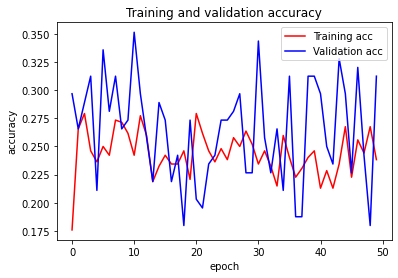

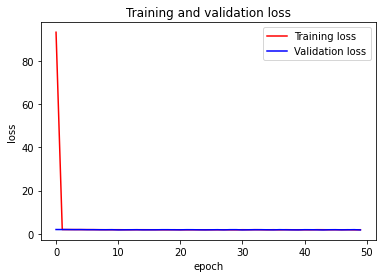

In [40]:
import matplotlib.pyplot as plt

accuracy = fit_history.history['acc']
val_accuracy = fit_history.history['val_acc']
loss = fit_history.history['loss']
val_loss = fit_history.history['val_loss']
num_epochs = range(len(accuracy))
plt.plot(num_epochs, accuracy, 'r', label='Training acc')
plt.plot(num_epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(num_epochs, loss, 'r', label='Training loss')
plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()